<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/Polynomial_linear_regression_with_single_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [41]:
dataset_x = np.linspace(-1, 1, 101)
print(f'dataset_x.shape = {dataset_x.shape}')

dataset_y = 3 * dataset_x**2 + 2 * dataset_x + 1 + np.random.randn(*dataset_x.shape) * 0.33

dataset_x.shape = (101,)


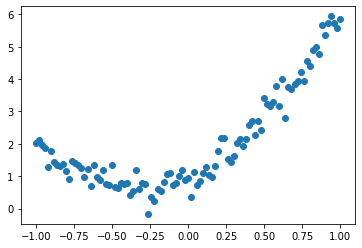

In [42]:
plt.scatter(dataset_x, dataset_y)
plt.show()

In [43]:
dataset = list(zip(dataset_x, dataset_y))
print(f'dataset = {dataset}') # list of (x, y) tuples

# Pandas dataframe
df_dataset =  pd.DataFrame.from_records(dataset, columns = ['x', 'y'] )

dataset_train = df_dataset.sample(frac=0.8, random_state=0)
print(f'dataset_train.shape = {dataset_train.shape}')
dataset_test = df_dataset.drop(dataset_train.index)
print(f'dataset_test.shape = {dataset_test.shape}')

dataset = [(-1.0, 2.0390822479854482), (-0.98, 2.1314224870614114), (-0.96, 1.9595272608858914), (-0.94, 1.8753903222076254), (-0.92, 1.281853353653993), (-0.9, 1.7819301827818315), (-0.88, 1.4477771171561857), (-0.86, 1.3600671640381798), (-0.84, 1.3008184121211392), (-0.8200000000000001, 1.3663925140993989), (-0.8, 1.1502247625457964), (-0.78, 0.9185762954911966), (-0.76, 1.4537103173637713), (-0.74, 1.410299523468335), (-0.72, 1.3409577136057464), (-0.7, 1.2598299119538416), (-0.6799999999999999, 0.96452007261691), (-0.6599999999999999, 1.2255633958673862), (-0.64, 0.7079724504287659), (-0.62, 1.3305587782385202), (-0.6, 0.9637797510287961), (-0.5800000000000001, 0.8932084551175452), (-0.56, 1.1954126365567044), (-0.54, 0.754654616867319), (-0.52, 0.7322388068485999), (-0.5, 1.3469761929144264), (-0.48, 0.6708586126216056), (-0.45999999999999996, 0.6187094215688316), (-0.43999999999999995, 0.7832845862708665), (-0.42000000000000004, 0.7448064666609373), (-0.4, 0.7896936033316007), (

In [44]:
train_features = dataset_train.copy()
test_features = dataset_test.copy()

train_labels = train_features.pop('y')
test_labels = test_features.pop('y')

x = np.array(train_features['x'])

In [45]:
# model with a single neuron
model = tf.keras.Sequential([
    layers.Dense(input_shape=(1,), units=1)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.predict(x[:10])

array([[-0.24937081],
       [ 0.37405625],
       [-0.49874163],
       [ 0.05195225],
       [ 0.25976127],
       [ 0.45717984],
       [-0.35327533],
       [ 0.23898038],
       [ 0.0415618 ],
       [ 0.47796077]], dtype=float32)

In [47]:
learning_rate = 0.1
optimizer=tf.optimizers.Adam(learning_rate=learning_rate)
# optimizer=tf.optimizers.SGD(learning_rate=learning_rate)

model.compile(
    optimizer=optimizer,
    loss='mean_absolute_error')

In [48]:
%%time
history = model.fit(
    train_features['x'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 8.19 s, sys: 144 ms, total: 8.33 s
Wall time: 8.3 s


In [49]:
x = np.linspace(-1, 1, 101)
y = model.predict(x)

In [50]:
def plot_fn(x, y):
  plt.scatter(train_features['x'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

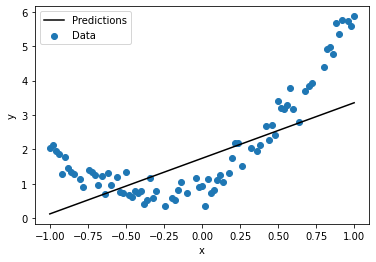

In [51]:
plot_fn(x,y)

We can see that a (single) neuron with a single input feature is only capable of learning a linear hypothesis: `h(x) = k*x + b`. To learn more complex functions of single independent variable, like e.g. h(x) = k3*x^3 + k2 * x^2 + k1 * x + k0 we need to treat powers of x as independent new variables (separate features) and feed them as inputs into the neuron.

In [52]:
# Let's expand our dataset with artificially created features:
dataset = list(zip(dataset_x, dataset_x**2,  dataset_y))
print(f'dataset = {dataset}') # list of (x, x^2, y) tuples

# Pandas dataframe
df_dataset =  pd.DataFrame.from_records(dataset, columns = ['x', 'x2', 'y'] )

dataset_train = df_dataset.sample(frac=0.8, random_state=0)
print(f'dataset_train.shape = {dataset_train.shape}')
dataset_test = df_dataset.drop(dataset_train.index)
print(f'dataset_test.shape = {dataset_test.shape}')

dataset = [(-1.0, 1.0, 2.0390822479854482), (-0.98, 0.9603999999999999, 2.1314224870614114), (-0.96, 0.9216, 1.9595272608858914), (-0.94, 0.8835999999999999, 1.8753903222076254), (-0.92, 0.8464, 1.281853353653993), (-0.9, 0.81, 1.7819301827818315), (-0.88, 0.7744, 1.4477771171561857), (-0.86, 0.7395999999999999, 1.3600671640381798), (-0.84, 0.7055999999999999, 1.3008184121211392), (-0.8200000000000001, 0.6724000000000001, 1.3663925140993989), (-0.8, 0.6400000000000001, 1.1502247625457964), (-0.78, 0.6084, 0.9185762954911966), (-0.76, 0.5776, 1.4537103173637713), (-0.74, 0.5476, 1.410299523468335), (-0.72, 0.5184, 1.3409577136057464), (-0.7, 0.48999999999999994, 1.2598299119538416), (-0.6799999999999999, 0.4623999999999999, 0.96452007261691), (-0.6599999999999999, 0.4355999999999999, 1.2255633958673862), (-0.64, 0.4096, 0.7079724504287659), (-0.62, 0.3844, 1.3305587782385202), (-0.6, 0.36, 0.9637797510287961), (-0.5800000000000001, 0.3364000000000001, 0.8932084551175452), (-0.56, 0.3136

In [70]:
# model with a single neuron
model = tf.keras.Sequential([
    layers.Dense(input_shape=(2,), units=1)
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [71]:
learning_rate = 0.1
optimizer=tf.optimizers.Adam(learning_rate=learning_rate)
# optimizer=tf.optimizers.SGD(learning_rate=learning_rate)

model.compile(
    optimizer=optimizer,
    loss='mean_absolute_error')

In [72]:
train_features = dataset_train.copy()
test_features = dataset_test.copy()

train_labels = train_features.pop('y')
test_labels = test_features.pop('y')

x = np.array(train_features['x'])
x2 = np.array(train_features['x2'])

In [73]:


train_features['x'].shape

(81,)

In [67]:
x.shape

(81,)

In [64]:
x2.shape

(81,)

In [65]:
# https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc

# tensor_input = list(zip(x, x2))

# Input layer of our model expects input_shape=(2,) which means a 2-element tuple (x and x^2).
# Let's merge x and x2 into a numpy matrix:
tensor_input = np.array([x, x2])
# tensor_input = tensor_input.T
tensor_input.shape

(2, 81)

In [68]:
tensor_input = np.stack((x, x2), axis=-1)
tensor_input.shape

(81, 2)

In [74]:
%%time
history = model.fit(
    tensor_input, train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 7.87 s, sys: 134 ms, total: 8.01 s
Wall time: 7.98 s


In [77]:
x = np.linspace(-1, 1, 101)
x2 = x**2

y = model.predict(np.stack((x, x2), axis=-1))

In [78]:
def plot_fn(x, y):
  plt.scatter(train_features['x'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

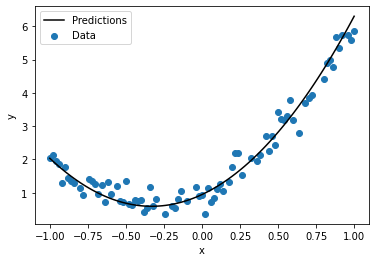

In [79]:
plot_fn(x,y)